
#Hidden Factors and Topics: 
##Applying Text Mining on Yelp Review Data to Improve Rating of Restaurants	




---

Group member:

Pancheng Qu, Xue Lian ,Yudi Xie , Lu Lu



#Abstract:
In order to uncover the latent topics which dominate the Yelp restaurant rating, we must analyse the review text by using data filtering and text mining functions, as well as the TF-IDF model. Since the Yelp reviews are unstructured data, we firstly distinguish featurization of text and discover the most frequent words occurring in all customers’ reviews, which helps us to label these words into ‘groups’ as different topics. 

Secondly, we focus on reviews of a single restaurant and apply model again to perceive a more accurately approach to the relation between topics and ratings. The goal of our project is to figure out which topic will boost or harsh restaurant’s rating, and then we can give advice to restaurant and help them improve their business quality which towards directly amount of revenue. This project evaluate on an open dataset from Yelp online resource with over 6974 restaurant reviews, consisting 16172 words. And we also proved that our method is able to implement on any restaurant which will be more convenient and useful for the real case analysis.




#1, Introduction: 

The main goal of our project is to compute customers’ common demand and level of satisfaction for all sample restaurants, which has shown directly from their review text. We will use matrix factorization to process these unstructured text data and find out the results. Besides that, we will pick two single restaurants and apply our method on them separately, in order to verify our method is well defined and can be used widely. And also we are curious about if there exist some specific demands for each restaurant. 



#2, Brief Description of Our Dataset

This project choose the ‘review.json’ data from Yelp open online dataset. This dataset includes full review text data about business_id, review_id, user_id, stars, useful, funny, cool, text, date columns on the form of JSON file. Since the online jupyter notebook and also google collaboratory have a storage limit, that we cannot successfully upload the whole ‘review.json’ (4GB) data. In order to fit the size of online python file, we need to slice this dataset at beginning. Firstly, we pick the train_review data, which filter out all businesses with more than 500 reviews and it ends up with 94 businesses in this train_review data. This process makes sure there are enough review data for analysing each restaurant. Furthermore, the size of train_review is pretty fitted since its size is 82.4MB.


In [0]:
!wget -nc -nv https://ucsb.box.com/shared/static/c5ulwkcaka7hych2ou8bjwz7p8gcvxyw.json -O business.json
! wget -nc -nv https://ucsb.box.com/shared/static/ne0i3no3ep9z8rjtob9ywm4uhtfrmeyn.pkl -O train_review.pkl

import pickle  
train_review = pickle.load(open('train_review.pkl', "rb" ))

import json

with open('business.json') as json_file:      
    data_business = json_file.readlines()
    data_business = list(map(json.loads, data_business)) 

import pandas as pd
review=pd.DataFrame(train_review)
review=review.sort_values(['business_id'])

#3, Implementation (Method)
3.1 Text Filtering and Cleaning:

 First of all, we want to focus on only the restaurants. Therefore we start to check in category columns of business.json since that column has the type of business. We start to find all business related to restaurants, and then our result is that in the 94 business, we have 85 restaurants. 

The function we used for text mining on Yelp dataset:

1. Tokenizing text
: Split a text corpus into sentences.

2. Expand contractions
: Expand the shortened words or syllables.

3. Removing special characters
: Remove unnecessary and special characters.

4. Removing stopwords
: Remove words that have little or no importance.

5. Lemmatization
: Remove word affixes in order to get to base form of the word.

In [0]:
business = pd.DataFrame.from_dict(data_business)
categ = business.loc[:,['business_id','categories']]
review_bus = review.groupby(['business_id']).mean() # see the mean rate of these 94 resturants 
mergedStuff = pd.merge(review_bus,categ, on=['business_id'], how='inner')
mask = mergedStuff["categories"].str.contains("Restaurants") == False
nonrest_index = mergedStuff[mask].index
nonrest_id = mergedStuff.iloc[[1, 9, 10, 23, 41, 51, 62, 67, 81],0].tolist()
rest = review[(review['business_id'] !='-9dmhyBvepc08KPEHlEM0w') & 
                 (review['business_id'] !='3T0Erqk1MKtN58764yZMfw') &
                 (review['business_id'] !='3_QNAH8yVzY0sBPftWyNhQ') &
                 (review['business_id'] !='EVxY3Vcc-4uavsq2CQsk3g') &
                 (review['business_id'] !='OneyDoIPnABworUjMHqXMA') &
                 (review['business_id'] !='VyjyHoBg3KC5BSFRlD0ZPQ') &
                 (review['business_id'] !='eStn1HCGNcKiLXc0pfvZxg') &
                 (review['business_id'] !='fwuvm9wWcvFwpQXzcneaDQ') &
                 (review['business_id'] !='qHQPvp6pZ75fB63kOKUPqg') ]

In [126]:
! pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt') # tockenizer
import re
import string
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [127]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens
! wget -nc -nv https://raw.githubusercontent.com/dipanjanS/text-analytics-with-python/master/Old-First-Edition/source_code/Ch04_Text_Classification/contractions.py
from contractions import CONTRACTION_MAP
CONTRACTION_MAP
def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        # not sure why below is there
        # expanded_contraction = first_char+expanded_contraction[1:] 
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
def remove_stopwords(text,stopword_list):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

nltk.download(['averaged_perceptron_tagger',
               'universal_tagset',
               'wordnet'])
from nltk import pos_tag
from nltk.corpus import wordnet as wn

# Annotate text tokens with POS tags
def pos_tag_text(text):
    
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None

    tagged_text = pos_tag(text)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
# lemmatize text based on POS tags    
def lemmatize_text(text):
    text = tokenize_text(text)
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

# Text normalization pipeline
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import re

from nltk.corpus import wordnet





def keep_text_characters(text):
    filtered_tokens = []
    tokens = tokenize_text(text)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def normalize_text(text,tokenize=False):
    text = expand_contractions(text, CONTRACTION_MAP)
    text = lemmatize_text(text)
    text = remove_special_characters(text)
    text = text.lower()
    text = remove_stopwords(text,ENGLISH_STOP_WORDS)
    text = keep_text_characters(text)


    return text

3.2 Test limits:

Since Jupyter notebook has limited storage, we decided to use Google Collaborate to do our missions. In the beginning, we start to input all the 85 restaurants and see if it has enough storage to run it. Unfortunately, the storage can not hold for all reviews for 85 restaurants. In the end, the maximal limit of reviews is around 20000 which is about 10 restaurants.

In [0]:
newrest=rest.head(6974)
firstrest=rest.head(1194)        #pick only the first resturants and do the decomposition, also consider the num of topics maybe overfit, consider decrease the topics
secondrest=rest.iloc[1194:2374,:]
rest5=[]
firstext=[]
secondtext=[]
for i in range(len(newrest)):
    rest5.append(newrest.iloc[i,7])

for i in range(len(firstrest)):
    firstext.append(newrest.iloc[i,7])

for i in range(len(secondrest)):
    secondtext.append(secondrest.iloc[i,7])
# do normalization

In [0]:
newreview_corpus_normrest5 = [normalize_text(text) for text in rest5] 
newreview_corpus_norm1 = [normalize_text(text) for text in firstext]
newreview_corpus_norm2 = [normalize_text(text) for text in secondtext]

3.3 TF-IDF model:

TF-IDF stands for *Term Frequency-Inverse Document Frequency*

$$
T_{ij}:=tf_{ij}\times idf_{ij}.
$$
1. Term frequency, $tf$
2. Inverse document frequency, $idf$, is the inverse of the document frequency for each term. It is computed by dividing the total number of documents in our corpus by the document frequency for each term and then applying logarithmic scaling on the result.

 the TF-IDF matrix, 
$$
T:=\{T_{1},\ldots,T_{n}\}
$$




In order to choose one restaurants and define its most obvious advantages from reviews and most serious problems from reviews. We first used group-by function to reorganize the data frame and set a for-loop to extract all reviews from that restaurants. 

After that, we start to do text cleaning process including removing special characters, removing stop words and expanded contractions. Then we use the method TF-IDF to get the shape of features and the name of features. 

A model named term frequency-inverse document frequency, also known as TF-IDF, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus [2]. Here we create a 16172 ⨉ 6974 matrix with all reviews as columns and all words remained after the text cleaning as rows. Thus, each value in the matrix correspond to the number of times a word appears in its corresponding reviews. Thus, the TF-IDF value can be quantified as a weighted factor in search of information retrieval. 

After we obtained the original X matrix, we apply Non-negative Matrix Factorization (NMF) method to get the W( 16172 ⨉ 10) and H( 10 ⨉ 6974) matrix. By NMF, we are able to find the importance of all 10 topics (Latent Factors) in 1194 reviews from the H matrix.

In [0]:
! wget -nc -nv https://raw.githubusercontent.com/dipanjanS/text-analytics-with-python/master/Old-First-Edition/source_code/Ch04_Text_Classification/feature_extractors.py
# TF-IDF 
import numpy as np
from feature_extractors import tfidf_transformer
from feature_extractors import bow_extractor    

def tf_idf(corpus):
    # Bag of words construction
    bow_vectorizer, bow_features = bow_extractor(corpus=corpus)
    # feature names
    feature_names = bow_vectorizer.get_feature_names()
    # TF-IDF    
    tfidf_trans, tdidf_features = tfidf_transformer(bow_features)
    tdidf_features = np.round(tdidf_features.todense(),2)
    return((tdidf_features, feature_names))

In [132]:
tdidf_featuresrest5,feature_namesrest5 = tf_idf(newreview_corpus_normrest5)
X = tdidf_featuresrest5.T
X.shape # (words, documents)

(16172, 6974)

3.3 Try to find a better algorithm between LDA and NMF for our matrix factorization

After we get the TF-IDF matrix, before we do the factoraztion, we try to We try to apply LDA and NMF algorithms to sample reviews，and  compare these two methods. Apply the better one to solve our problems here. 

Latent Dirichlet Allocation (LDA) is a Bayesian generative model for text. It is used as a topic model to discover the underlying topics that are covered by a text document. LDA assumes that a corpus of text documents cover a collection of K topics. Each topic is defined as a multinomial distribution over a word dictionary with |V | words drawn from a Dirichlet βk ∼ Dirichlet(η).

Non-Negative matrix decomposition: from the previous step, we have already got shape of features, then the next step is do to matrix decomposition and get matrix W(word X topics) and H(topics X reviews) . we decided to choose two restaurants and analyze them.


According to our results here, we can see that NMF method uses less time(1.636s) than LDA method(14.788s). And for each topic we generate, the NMF’s topics are more correlated which are easier to interpret. Therefore, we choose to use NMF as our analysing method.


In [133]:
from __future__ import print_function
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples = 10000
n_features = 1000
n_topics = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


print("Loading dataset...")
t0 = time()

samples = newreview_corpus_normrest5
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(samples)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
done in 0.003s.
Extracting tf-idf features for NMF...
done in 0.325s.
Extracting tf features for LDA...
done in 0.324s.
Fitting the NMF model with tf-idf features, n_samples=10000 and n_features=1000...
done in 1.599s.

Topics in NMF model:
Topic #0:
buffet mgm breakfast vega food selection crab grand price dessert leg eat dinner brunch quality variety good station lunch pay
Topic #1:
meat montreal smoke best smoked place visit schwartzs schwartz tourist town love classic famous live world lineup time come trip
Topic #2:
dog hot leash short truck cheese naan beer try love topping fried spicy bear bun pickle phoenix delicious bread peanut
Topic #3:
taco fish salsa margarita carne chip joyride asada tuesday crispy love hour happy street chicken mexican atmosphere gilbert drink burrito
Topic #4:
pasta dish spaghetti scarpetta bread view restaurant ravioli duck bellagio vega foie gras delicious fountain rib order best sauce dessert
Topic #5:
great food service love place

In [0]:
def extract_topic_top_words(W, all_words, num_top_words=10):
    
    num_words, num_topics = W.shape
    
    assert num_words == len(all_words)
    
    for t in range(0, num_topics):
        top_words_idx = np.argsort(W[:,t])[::-1]  # descending order
        top_words_idx = top_words_idx[:num_top_words]
        top_words = [all_words[k] for k in top_words_idx]
        top_words_shares = W[top_words_idx, t]
        print('# Topic', t+1)
        for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
            print(word, share)
        print('\n')

In [0]:
def non_negative_marix_decomp(n_components,train_data):
    import sklearn.decomposition as skld
    model = skld.NMF(n_components=n_components, 
                     init='nndsvda', max_iter=500, 
                     random_state=0)
    W = model.fit_transform(train_data)
    H = model.components_
    nmf = (W,H)
    return(nmf)
! wget -nc -nv https://raw.githubusercontent.com/dipanjanS/text-analytics-with-python/ed5ea8068428fec37d1d06ec40cb9d64c6336d77/Old-First-Edition/source_code/Ch05_Text_Summarization/topic_modeling.py

##4 Results and Analysis

4.1. Hidden Topics from these 5 restaurants


First of all, we choose 5 restaurants as our sample and try to find the common topics of these five restaurants. We want to see what in general people care most about the restaurants. After the NMF, we define these 10 topics and think these are most relative topics with restaurants. 

In the following chart, the deepest red means the frequency of this word in that topic is the highest and the blue means the frequency of this word in that topic is relatively low.

<a href="https://ibb.co/GVcvcWH"><img src="https://i.ibb.co/brzgzsb/20191212215023.png" alt="20191212215023" border="0">

In [136]:
r = 10 # no. of topics
W_topic10,H_topic10 = \
    non_negative_marix_decomp(n_components = r, train_data = X) 

H_topic10 /= H_topic10.sum(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [137]:
extract_topic_top_words(W_topic10, feature_namesrest5)

# Topic 1
buffet 1.700889458134589
mgm 0.49303595123471955
breakfast 0.4399199103796454
food 0.38893506538643474
vega 0.36428532415052867
selection 0.30180910184130494
crab 0.28914884155132664
grand 0.26272537374263055
price 0.25999569952943724
dessert 0.25615621590875265


# Topic 2
sandwich 2.5148970888544513
pickle 0.8140411693999816
fry 0.6865895608783061
meat 0.5908231496933676
deli 0.5347391517006428
cherry 0.5195088243437382
medium 0.5191233984318294
smoked 0.5013443749520853
mustard 0.46067441479487575
order 0.4605721617052909


# Topic 3
dog 2.7224965216759953
hot 1.3584949622777551
leash 0.6240809679099233
truck 0.5099647819391375
short 0.47659330794591437
naan 0.33864494301789916
cheese 0.3377184724438465
try 0.31909500628541515
beer 0.31373140750053724
topping 0.28039152637940035


# Topic 4
taco 2.7679817636223296
fish 0.8328390214659771
salsa 0.6285486353762213
margarita 0.5096575220338384
chip 0.4610200156498716
carne 0.4536443529963733
asada 0.4269208293151161
joyride 0

In [0]:
num_topics, num_reviews = H_topic10.shape

H10df = pd.DataFrame(H_topic10, 
                     index=['topic'+str(one) for one in range(1, num_topics+1)], 
                     columns=['review'+str(one) for one in range(1, num_reviews+1)])

Text(0.5, 1.0, 'percentage of 10 topic in review for five resturant')

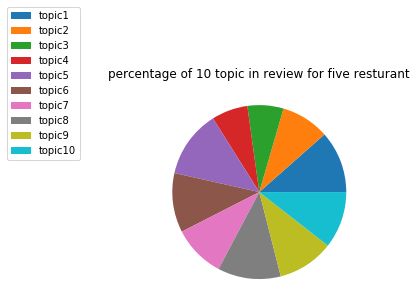

In [139]:
labels=['topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9','topic10']  ##plot the pie chart
plt.pie(H10df.sum(axis=1))
plt.legend(labels,loc='center right',bbox_to_anchor=(-0.3, 1))
plt.title('percentage of 10 topic in review for five resturant')

According to our NMF results and the pie chart, users care the most about Service and Food Quality of all of these subtopics, weighting 22.75% of all reviews.  Users among these restaurants also care greatly about Atmosphere(10.48%) .  Like our topic shows, among these 5 restaurants, there are mexican ,italian, fast food, and buffet food categories. Among these topics, food categories like Italian(12.55%) and Buffet(11.52%) also making up a large portion of the reviews. And there are some interesting topics like Great for Tourists(10.54%) it may indicate that if the restaurants are attractive for the visitors, especially in a tourism city.

4.2 
The First sample restaurant

We choose the first restaurant as our first sample. We start to input all of its reviews and do TF-IDF method. Then we decompose the feature shape matrix we got and extract words from feature names to define topics.



In [140]:
tdidf_features1,feature_names1 = tf_idf(newreview_corpus_norm1) 
X1 = tdidf_features1.T
X1.shape # (words, documents)

(4470, 1194)

In [0]:
r = 5 # no. of topics
W1_topic5,H1_topic5 = \
    non_negative_marix_decomp(n_components = r, train_data = X1) 

H1_topic5 /= H1_topic5.sum(0)

For the restaurant one, we try to define what is the best number for topics. We first tried 10 topics but we find 10 topics are overfitted. Therefore we tried different number and choose 5 topics are best fitted to interpret. 


Here are 5 topics we defined in this chart.

<a href=" "><img src="https://i.ibb.co/2nj3rtq/20191212220940.jpg" alt="20191212220940" border="0">



In [142]:
extract_topic_top_words(W1_topic5, feature_names1)

# Topic 1
wait 0.5732186247437893
time 0.5264927878012123
drink 0.4636232730103063
order 0.4406263301337924
come 0.4278233792862477
table 0.383207185204528
food 0.3303970160466581
minute 0.2965898834206665
service 0.28364799588995854
ask 0.27606845337536845


# Topic 2
great 1.35592319438648
love 0.7717388417233392
food 0.6764467384594451
place 0.6758851866888139
service 0.5156873402362262
atmosphere 0.45946652895756057
awesome 0.2765905388223604
friendly 0.2657086587175189
amazing 0.2529121433801496
fun 0.23342887597999792


# Topic 3
taco 1.5500890406849426
fish 1.0713838331133478
crispy 0.6411687044530907
carne 0.4699822340572369
asada 0.43409426094330716
best 0.41517148291392564
tuesday 0.3508082168915836
margarita 0.30245917569446384
favorite 0.3011943379135447
shrimp 0.2830175715183512


# Topic 4
hour 1.153571180994124
happy 1.1108294198566007
margarita 0.42758546926698776
taco 0.2717845409061429
drink 0.22031895020103842
price 0.2081549726452413
great 0.18780175526184817
specia

In [0]:
num_topics1, num_reviews1 = H1_topic5.shape

H5df1 = pd.DataFrame(H1_topic5, 
                     index=['topic'+str(one) for one in range(1, num_topics1+1)], 
                     columns=['review'+str(one) for one in range(1, num_reviews1+1)])

Here we define what is considered as good review and what is considered as bad reviews. In the beginning, we define bad reviews are those rates are less than or equal to 1, and good reviews are those rates which are higher than 4 stars. However, we find that review equal or less than one star is only around 70. Therefore we decide to include more bad reviews to balance our data by increaseing the cutting point for bad reviews from one star to two stars.

In [144]:
sample1=firstrest              #get the number of all reviews from first resturants

l=[i for i in range(0,len(sample1))]        #create a list for new index
sample1['reviewid']=l            #add a new index to a new column
sample1
good=sample1.loc[(sample1['stars'] >= 4)]  #let reviews greater than or equal to 4 are good 
good
bad=sample1.loc[(sample1['stars'] <= 2)] #let rate one or less than one is bad

list3=bad['reviewid'].tolist()          #create a empty list and extract the bad reviews to a new list
badframelist = []
for i in range(0,len(list3)):
  badframelist.append(H5df1.iloc[:,list3[i]].tolist())
  
  badframe=pd.DataFrame(badframelist).T
topic4=pd.concat([badframe.mean(axis = 1),badframe.var(axis =1)],axis = 1)
badmean=badframe.mean(axis = 1)     #calculate the mean of rows
topic4.columns=['badmean','badvariance']
topic4.index=['topic1','topic2','topic3','topic4','topic5']
topic4



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


badmean  badvariance
topic1  0.444046     0.073569
topic2  0.100385     0.018383
topic3  0.127201     0.032614
topic4  0.052394     0.011264
topic5  0.275974     0.042111

In [145]:
list4=good['reviewid'].tolist()       #same thing we did to good reviews

goodframelist=[]
for i in range(0,len(list4)):
  goodframelist.append(H5df1.iloc[:,list4[i]].tolist())
testframe=pd.DataFrame(goodframelist).T
topic42=pd.concat([testframe.mean(axis = 1),testframe.var(axis =1)],axis = 1)
goodmean=testframe.mean(axis = 1)
topic42.columns=['goodmean','goodvariance']
topic42.index=['topic1','topic2','topic3','topic4','topic5']
topic42

goodmean  goodvariance
topic1  0.192806      0.038351
topic2  0.267367      0.053736
topic3  0.195885      0.038884
topic4  0.126532      0.038103
topic5  0.217410      0.038824

Then we plot line chart and pie chart to see the trend of good mean and bad mean. It is obvious that good review focus on topic2 and bad reviews are focus on topic1. The chart is more obvious when compared to dataframe

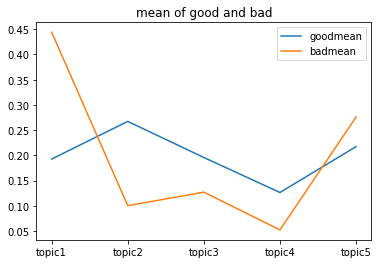

In [146]:
import matplotlib.pyplot as plt  #plot the graph
x=['topic1','topic2','topic3','topic4','topic5']

plt.plot(goodmean,label='goodmean')
plt.plot(badmean,label='badmean')

plt.xticks(np.arange(5), ('topic1','topic2','topic3','topic4','topic5'))
plt.title('mean of good and bad')
plt.legend()
plt.show()

Text(0.5, 1.0, 'percentage good review for first resturant')

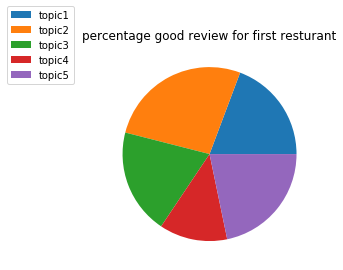

In [147]:
labels=['topic1','topic2','topic3','topic4','topic5']
plt.pie(goodmean)
plt.legend(labels,loc='center right',bbox_to_anchor=(-0.1, 1))
plt.title('percentage good review for first resturant')

Text(0.5, 1.0, 'percentage bad review for first resturant')

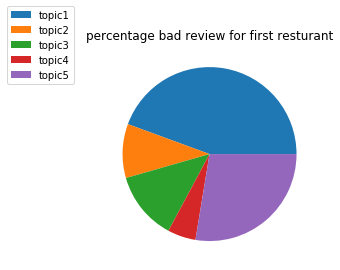

In [148]:
labels=['topic1','topic2','topic3','topic4','topic5']
plt.pie(badmean)
plt.legend(labels,loc='center right',bbox_to_anchor=(-0.1, 1))
plt.title('percentage bad review for first resturant')

From the pie chart and line plot, we find that the people think the topics one (waiting experience) is the worst. Then we trace back to the original data and find the original review really talks about the waiting experience. Here are some example of bad reviews.

####*Slowest service ever. Sat at our table waiting for so long ended up just having to leave.'*


####*'I'll start off with the horrible seating process which starts off with a 45min wait for NO reason. We arrived on a Friday night about 7:30pm and had a seat at the bar until a table was ready. As we looked around, there was easily 6 tables and a booth available for patrons. The hostesses just keep chatting amongst themselves and then they'd call all seven parties at once causing a huge cluster at the front.I won't be back.*


Then we also try to test if the good topics fitted the real reviews. We find some original reviews about automosphere and here are exmaples.

####*'I really like coming here after a long day at work! I tend to come like an hour or so before closing time, and I find the dim interior and loud music kind of relaxing in a way. The food here is pricey but delicious. My favorite things to order here are three tacos plus a side, the carne asada nachos, and the brownie. They're more often than not out of my budgetー I'm an unfortunate soul who can't make it to happy hour...'*

####*'I have been here three times now and like it says above "I\'m a fan!" My favorite is the fish tacos and carnitas. They have all been excellent however. I did have a burrito once and while it was good, I would stick to the tacos in the future. The chocolate and churros are also a yummy good treat! They have great happy hour specials on drinks and tacos. Love the atmosphere in this place, fun retro vibe. Service is a little slow sometimes but nothing horrible.'* 




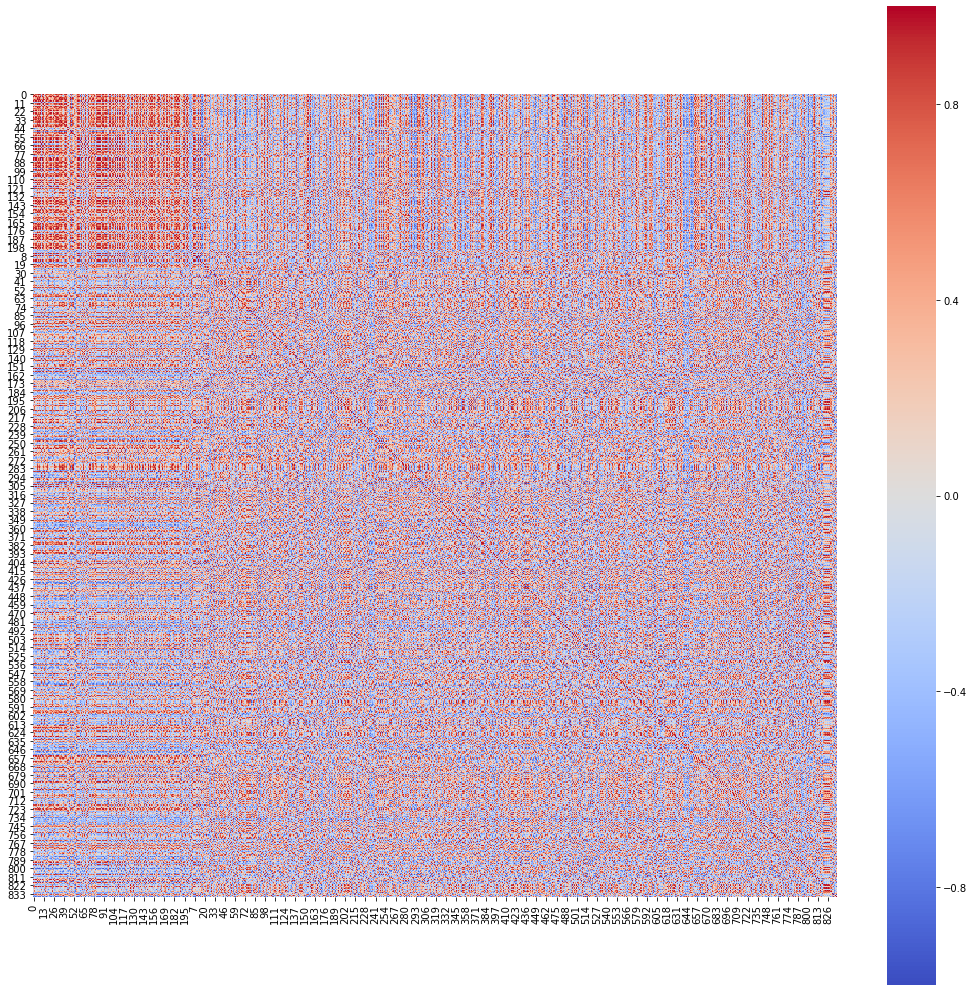

In [149]:
tt1=pd.concat([badframe,testframe],axis=1) #we try to combine all good reviews and bad reviews to a new dataframe
split0_corr = tt1.corr()       #calculate the correlation and graph the coolwarm plot.
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,18))
ax = sns.heatmap(split0_corr, square=True, cmap="coolwarm");

From the heat map above, we can see the correlation among good and bad reviews. The bad reviews have strong correlation but the good reviews have weak correlation.

4.3 
The second sample restaurant

We here choose the second resturant to test if our method works. Here we are still doing the same analysis to test the topics.  

In [150]:
tdidf_features2,feature_names2 = tf_idf(newreview_corpus_norm2)
X2 = tdidf_features2.T
X2.shape # (words, documents)

(5011, 1180)

In [0]:
r = 5 # no. of topics
W2_topic5,H2_topic5 = \
    non_negative_marix_decomp(n_components = r, train_data = X2) 

H2_topic5 /= H2_topic5.sum(0)

For the restaurant two, we try to define what is the best number for topics. We first tried 10 topics but we find 10 topics are overfitted. Therefore we tried different number and choose 5 topics are best fitted to interpret.

Here are 5 topics we defined in this chart.

<a href=" "><img src="https://i.ibb.co/ZmSCqfw/20191212221550.jpg" alt="20191212221550" border="0">

In [152]:
extract_topic_top_words(W2_topic5, feature_names2)

# Topic 1
food 0.6782163059923063
place 0.5038431593036795
like 0.5035407844633287
eat 0.4638614179463975
bad 0.3654423866250816
just 0.3273456524590414
taste 0.31959217828763814
pay 0.28758481486843934
line 0.2871898150957483
wait 0.2854790569441756


# Topic 2
breakfast 1.6297929093573802
lunch 0.47901602019710604
egg 0.3938836463714938
station 0.2523037737339166
bacon 0.2261936656061625
item 0.20221639332332075
omelet 0.19780980893364958
buffet 0.18611561986147582
make 0.17791556787351703
fruit 0.17678823400470745


# Topic 3
crab 0.82244827165229
leg 0.6276664059501843
rib 0.4891956606808643
prime 0.444315030435813
shrimp 0.388497187099953
dessert 0.36405121761664605
good 0.2987566403121063
dinner 0.28196151167318373
bar 0.273175717753209
salad 0.26160546698877835


# Topic 4
great 1.0770687271444872
good 0.7599431481130705
food 0.6688641938032756
service 0.40819113281236796
variety 0.3878329050183022
selection 0.359583677107626
really 0.35850018915387255
price 0.32017909549339085


In [0]:
num_topics2, num_reviews2 = H2_topic5.shape

H5df2 = pd.DataFrame(H2_topic5, 
                     index=['topic'+str(one) for one in range(1, num_topics2+1)], 
                     columns=['review'+str(one) for one in range(1, num_reviews2+1)])

In [154]:
sample2=secondrest        #get the number of all reviews from first resturants
      

l=[i for i in range(0,len(sample2))]        #create a list for new index
sample2['reviewid']=l            #add a new index to a new column
good=sample2.loc[(sample2['stars'] >= 4)]  #let reviews greater than or equal to 4 are good 
good
bad=sample2.loc[(sample2['stars'] <= 1)] #let rate one or less than one is bad

list3=bad['reviewid'].tolist()          #create a empty list and extract the bad reviews to a new list
badframelist = []
for i in range(0,len(list3)):
  badframelist.append(H5df2.iloc[:,list3[i]].tolist())
badframe=pd.DataFrame(badframelist).T
T1=pd.concat([badframe.mean(axis = 1),badframe.var(axis =1)],axis = 1)
T1.columns=['badmean','badvariance']
T1.index=['topic1','topic2','topic3','topic4','topic5']
print(T1)
badmean=badframe.mean(axis = 1)     #calculate the mean of rows

list4=good['reviewid'].tolist()       #same thing we did to good reviews

goodframelist=[]
for i in range(0,len(list4)):
  goodframelist.append(H5df2.iloc[:,list4[i]].tolist())
goodframe=pd.DataFrame(goodframelist).T
T2=pd.concat([goodframe.mean(axis = 1),goodframe.var(axis =1)],axis = 1)
T2.columns=['goodmean','goodvariance']
T2.index=['topic1','topic2','topic3','topic4','topic5']
print(T2)
goodmean=goodframe.mean(axis = 1)

         badmean  badvariance
topic1  0.470674     0.064343
topic2  0.055466     0.015713
topic3  0.136292     0.035208
topic4  0.105939     0.017452
topic5  0.231628     0.049012
        goodmean  goodvariance
topic1  0.165856      0.035015
topic2  0.157639      0.047728
topic3  0.203074      0.051846
topic4  0.287293      0.059674
topic5  0.186138      0.031640


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


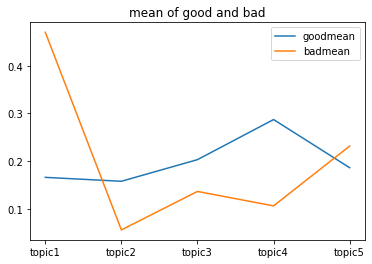

In [155]:
import matplotlib.pyplot as plt  #plot the graph
x=['topic1','topic2','topic3','topic4','topic5']

plt.plot(goodmean,label='goodmean')
plt.plot(badmean,label='badmean')

plt.xticks(np.arange(5), ('topic1','topic2','topic3','topic4','topic5'))
plt.title('mean of good and bad')
plt.legend()
plt.show()

Text(0.5, 1.0, 'percentage good review for first resturant')

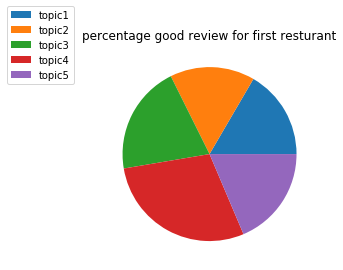

In [156]:
labels=['topic1','topic2','topic3','topic4','topic5']
plt.pie(goodmean)
plt.legend(labels,loc='center right',bbox_to_anchor=(-0.1, 1))
plt.title('percentage good review for first resturant')

Text(0.5, 1.0, 'percentage bad review for first resturant')

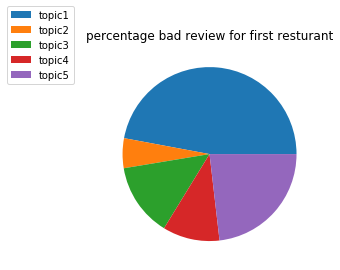

In [157]:
labels=['topic1','topic2','topic3','topic4','topic5']
plt.pie(badmean)
plt.legend(labels,loc='center right',bbox_to_anchor=(-0.1, 1))
plt.title('percentage bad review for first resturant')

From the pie chart and line plot, we find that the people think the topics one (food quality) is the worst. Then we trace back to the original data and find the original review really talks about the food quality. Here are some example of bad reviews.

####*'Just food.  Nothing really tasty.  Some stuff tasted old.  For 30 bucks you can probably do better.'*

####*'It is overrated the food is not worth what you pay for but the waiters are always keeping check if you need anything'*

Then we also try to test if the good topics fitted the real reviews. We find some original reviews about service and here are exmaples.

####*'It is overrated the food is not worth what you pay for but the waiters are always keeping check if you need anything'*

####*'I visited the MGM Grand buffet again for dinner on Friday, December 11th for a party of two.  I would again give this buffet solid ratings. We were seated promptly and the persons that were hosting at the top of the ramp as well as the person who seated us were very friendly.  In addition, we had an incredibly friendly server as well, who was very attentive.I consistently find the buffet at MGM Grand to have such a great selection, while having incredible flavors and tastes.*

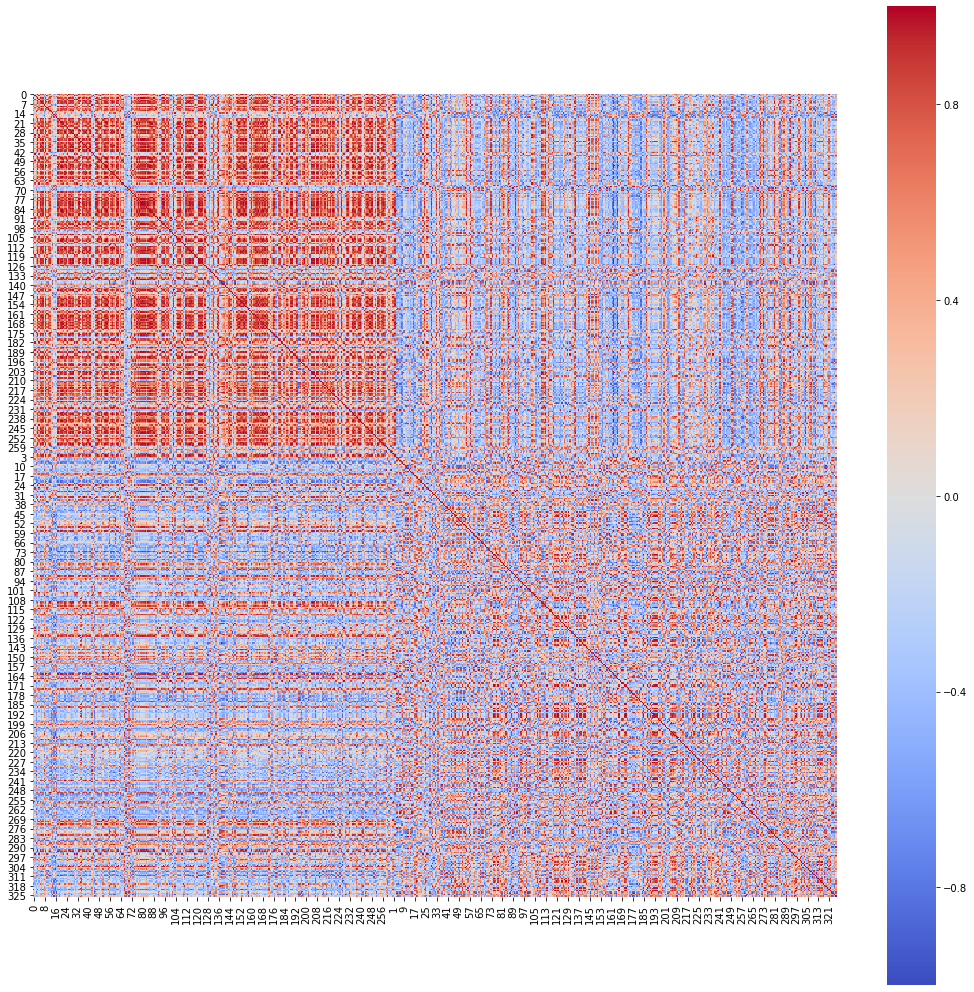

In [158]:
tt1=pd.concat([badframe,goodframe],axis=1) #we try to combine all good reviews and bad reviews to a new dataframe
split0_corr = tt1.corr()       #calculate the correlation and graph the coolwarm plot.
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,18))
ax = sns.heatmap(split0_corr, square=True, cmap="coolwarm");

From the heat map above, we can see the correlation among good and bad reviews. The bad reviews have strong correlation but the good reviews do not have strong correlation.

4.4 Add Rate

We try to add rate of each review before we do non-negative matrix decomposition and see will it automatically show which topic is the most important.

In [159]:
rate=[]
for i in range(1194):
  rate.append(firstrest.iloc[i,3])
A=np.array(rate).reshape((1194,1))
Y=np.concatenate((X1,A.T), axis=0)  ##add rate
r = 5 # no. of topics
newW1_topic5,newH1_topic5 = \
    non_negative_marix_decomp(n_components = r, train_data = Y) 

newH1_topic5 /= newH1_topic5.sum(0)
pd.DataFrame(newW1_topic5)

0         1         2         3         4
0      0.000681  0.002597  0.000000  0.000000  0.000000
1      0.000000  0.006191  0.000000  0.000000  0.000100
2      0.000927  0.000000  0.000000  0.000000  0.000000
3      0.000698  0.000000  0.000000  0.000233  0.000000
4      0.000057  0.000000  0.000000  0.000000  0.018794
...         ...       ...       ...       ...       ...
4466   0.000000  0.001262  0.000000  0.002179  0.000000
4467   0.000000  0.002691  0.000331  0.000000  0.000000
4468   0.000219  0.000940  0.016636  0.000000  0.000000
4469   0.000000  0.000000  0.002665  0.002508  0.000000
4470  11.812636  1.449075  0.696879  0.921405  0.819989

[4471 rows x 5 columns]

In [160]:
rate2=[]
for i in range(1180):
  rate2.append(secondrest.iloc[i,3])
A2=np.array(rate2).reshape((1180,1))
Y2=np.concatenate((X2,A2.T), axis=0)  ##add rate
r = 5 # no. of topics
newW2_topic5,newH2_topic5 = \
    non_negative_marix_decomp(n_components = r, train_data = Y2) 

newH2_topic5 /= newH2_topic5.sum(0)
pd.DataFrame(newW2_topic5)

0         1         2         3         4
0     0.000000  0.002072  0.010249  0.000000  0.000000
1     0.000000  0.000000  0.013718  0.000000  0.000000
2     0.000174  0.000000  0.011368  0.000000  0.000000
3     0.000000  0.000000  0.008779  0.000000  0.000000
4     0.000881  0.000000  0.000000  0.000000  0.000000
...        ...       ...       ...       ...       ...
5007  0.000000  0.024797  0.000000  0.000000  0.000000
5008  0.000157  0.004146  0.000000  0.000503  0.000000
5009  0.000693  0.000000  0.001549  0.000000  0.000000
5010  0.000000  0.000000  0.000000  0.002183  0.007742
5011  9.993753  0.890997  1.142501  1.027093  0.254924

[5012 rows x 5 columns]

We find out that after decomposition, the numbers of first topic are abnormally high. We try to find out and consider why this happened. The first thing we did is to reduce the number of topics. However, after we reduce the number of topic, the number on topic one is still pretty high. Then we start to check H DataFrame to see the coeffcients of each columns.

In [161]:
pd.DataFrame(newH1_topic5)

0         1         2     ...      1191      1192      1193
0  0.406539  0.617759  0.508982  ...  0.404645  0.771493  0.545315
1  0.593461  0.329099  0.211342  ...  0.442989  0.016286  0.029481
2  0.000000  0.053142  0.000000  ...  0.106300  0.212220  0.116742
3  0.000000  0.000000  0.279676  ...  0.002717  0.000000  0.126279
4  0.000000  0.000000  0.000000  ...  0.043349  0.000000  0.182184

[5 rows x 1194 columns]

In [162]:
pd.DataFrame(newH2_topic5)

0         1         2     ...      1177      1178      1179
0  0.844221  0.408213  0.691692  ...  0.409892  0.675238  0.673051
1  0.000000  0.589330  0.071167  ...  0.156428  0.000000  0.095085
2  0.000000  0.002457  0.047341  ...  0.360082  0.000000  0.014322
3  0.020023  0.000000  0.152826  ...  0.001709  0.049817  0.000000
4  0.135756  0.000000  0.036974  ...  0.071888  0.274946  0.217542

[5 rows x 1180 columns]

From the H dataframe, we see the each cell for first row has number, but for the other rows, they have some more and some less zero in the rows. We think this may be one reason that the first number of last row of W dataframe is abnormally high. The second reason for this abnormal value is that, from the chart and dataframe of goodmean and badmean, we can clearly see that the sum of good mean and bad mean is the highest in the first topic. It indicates that no matter good or bad reviews, people love to talk about topic one. That may indicate the second reason why the first number is abnormally high.

#5, Shortcomings

5.1 Storage Limitation:

First of all, review.json data is too large to upload into the online jupyter notebook. Then we changed to use the google collaboratory, which has 12 GB storage. 

5.2 Interpretation of our hidden topics:

The number of topics is depends on the number of reviews and also the frequency of each words. For example, when we analyse these 5 restaurants, which as 6000 reviews, then we can choose a larger number of topics (ten topics). 
But in later parts, we only analyse for one restaurant, and usually there are around 1000 reviews, which is much smaller than the total reviews. Then we choose five topics for particular restaurant. Because when we select three topics for a single restaurant.

5.3 Group the reviews into ‘good’ and ‘bad’ categories:

First using the star rating of each restaurant to split the manipulated dataframe grouped by business_id into “good” and “bad” data frame, where “good” data frame contains all the reviews which have star rating higher than the restaurant star rating, and the “bad” data  frame contains all the reviews which have star rating lower than the restaurant star rating. However, we find that all the restaurant we have selected have respectively high restaurant star rating where most of the ratings are higher than 4. Thus, we consider using an alternative method to do the data frame splitting, since it makes no sense to categorize reviews with star rating 4 into the “bad reviews”. Based on the abnormality, we decide that if the star rating is lower than 3 stars, then the corresponding review will be labeled as bad; otherwise the corresponding review will be labeled as good.



#6, Conclusion

Based on our computation and comparison, we can conclude that our analysis for advantages and disadvantages of each restaurant is successful. On the one hand, for resturarnts one, we find its biggest disadvantage is the waiting time. Many customers complained about the waiting experience and we have found the corresponding review from the dataset. On the other hand, the restaurant one, the individual service for each customer is good. It indicates that although the waiting time for this restaurant is very long, but its automosphere after waiting is pretty good. Therefore, our suggestion for this restaurant is that expand the size of the restaurant and make it can contain more customers. 


Secondly, for restaurant two, we also find its advantages and disadvantages. The strongest advantage of restaurant two is service, but the most serious disadvantage is its food quality. Therefore we suggest that the restaurant may hire some more chef and do more cuisines.

We also use 5 restaurants as our sample and try to find what customers care most about restaurants. Based on the matrix, we have been able to show what users care about most in their reviews of restaurants, and have been able to pinpoint the areas of interest for specific restaurants. Overall, it turned out that users care most about service, food quality and atmosphere. Based on the topics we have found, we predicted stars of hidden topics. Those stars varied around the range of the overall rating of the restaurant, as we expected, with lower and higher ratings in certain areas. With these ratings of specific subtopics that Yelp users care
about, restaurants could earn insights on how to improve their businesses. 


Through future works, we expect to explore more accurate and specific insights, possibly beneficial to restaurants, from a larger amount of reviews. In this report, since we only focus on some text mining functions and techniques, there may be a slight inaccuracy. And also, based on the limitation of the storage that we cannot imput a great number of restaurants. If we can do so, we could test the restaurants by their types（ie. chinese restaurants, korean foods, New American etc.) Testing these restaurants by their categories will also increase the accuracy of the result. And as for text analysis, the sentimental analysis is also a good tool for us to explore the attitudes of people about a specific restaurant, which we would like use it to explore more interesting insight from the reviews in the future.



#7, Reference

[1] D. Blei, A. Ng, and M. Jordan. ”Latent Dirichlet Allocation.” Journal of Machine Learning Research, 3:9931022, January 2003.

[2] tf-idf, WIKIPEDIA,The Free Encyclopedia,  https://en.wikipedia.org/wiki/Tf%E2%80%93idf December 2019.


